## Importing Libraries

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Getting Data

In [63]:
df = pd.read_csv('dataset.csv')
df['Like'].unique()

array(['-3', '2', '1', '4', 'I love it!+5', 'I hate it!-5', '-2', '3',
       '0', '-4', '-1'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [4]:
## checking for missing values
df.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

Observations

* There are no missing values.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Like,1453.0,0.763248,3.120244,-5.0,-1.0,1.0,3.0,5.0
Age,1453.0,44.604955,14.221178,18.0,33.0,45.0,57.0,71.0


*  Mean of the age of cutomers is 45.
*  Min Age is 18 where as maximum is 71.

In [6]:
df.describe(include=['O']).T

,count,unique,top,freq
yummy,1453,2,Yes,803
convenient,1453,2,Yes,1319
spicy,1453,2,No,1317
fattening,1453,2,Yes,1260
greasy,1453,2,Yes,765
fast,1453,2,Yes,1308
cheap,1453,2,Yes,870
tasty,1453,2,Yes,936
expensive,1453,2,No,933
healthy,1453,2,No,1164


## Data Processing

In [3]:
category = []
for i in df.columns:
  if df[i].dtype=='O':
    category.append(i)


for i in category:
  print('Distribution of',i)
  print(df[i].value_counts())
  print('-'*60)

Distribution of yummy
Yes    803
No     650
Name: yummy, dtype: int64
------------------------------------------------------------
Distribution of convenient
Yes    1319
No      134
Name: convenient, dtype: int64
------------------------------------------------------------
Distribution of spicy
No     1317
Yes     136
Name: spicy, dtype: int64
------------------------------------------------------------
Distribution of fattening
Yes    1260
No      193
Name: fattening, dtype: int64
------------------------------------------------------------
Distribution of greasy
Yes    765
No     688
Name: greasy, dtype: int64
------------------------------------------------------------
Distribution of fast
Yes    1308
No      145
Name: fast, dtype: int64
------------------------------------------------------------
Distribution of cheap
Yes    870
No     583
Name: cheap, dtype: int64
------------------------------------------------------------
Distribution of tasty
Yes    936
No     517
Name: tasty, 

Observations
*  Majority of the customers visits once a month
*  +3 is given my most of the customers
*  60% customers Found the food yummy
*  Approx 90 percent doesn't found convinent and spicy
*  Most of the customers found the service fast and cheap
*  A few customers found the food disgusting
*  Majority customers are Female customers

In [4]:
df['Age'].value_counts().sort_values()

71     1
19    10
68    13
69    14
70    15
18    16
21    16
66    17
28    18
46    19
20    21
45    22
41    23
65    23
22    23
54    24
63    25
27    25
43    25
48    26
67    26
61    26
33    26
25    26
38    27
31    27
40    27
30    28
29    28
34    28
39    29
23    30
42    30
47    30
51    30
35    30
24    30
26    31
53    31
44    32
64    32
56    32
32    33
50    34
62    34
49    34
36    35
58    35
52    36
57    36
59    36
37    37
60    38
55    53
Name: Age, dtype: int64

In [64]:
## creating bins for the age

df['Agebin'] = pd.cut(df['Age'], bins = [17,25, 35, 49, 60, 75], labels = ['17-25','26-35', '36-49', '50-60', '61-75'])

In [4]:
df['Agebin'].value_counts()/len(df)*100

36-49    27.253957
50-60    26.496903
26-35    18.857536
61-75    15.554026
17-25    11.837577
Name: Agebin, dtype: float64

Observations
*  More than 50% of the customers belongs to 36-50
*  only 11% customers belongs to adult age

## Data Visualization

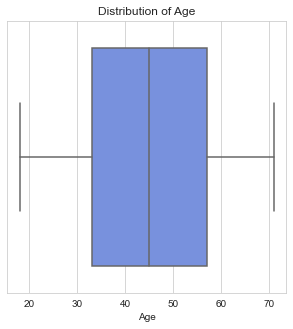

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(5,5))
sns.set_palette('coolwarm')
sns.boxplot(x=df['Age'])
plt.title('Distribution of Age')
plt.show()

*  There are no outliers in the Age

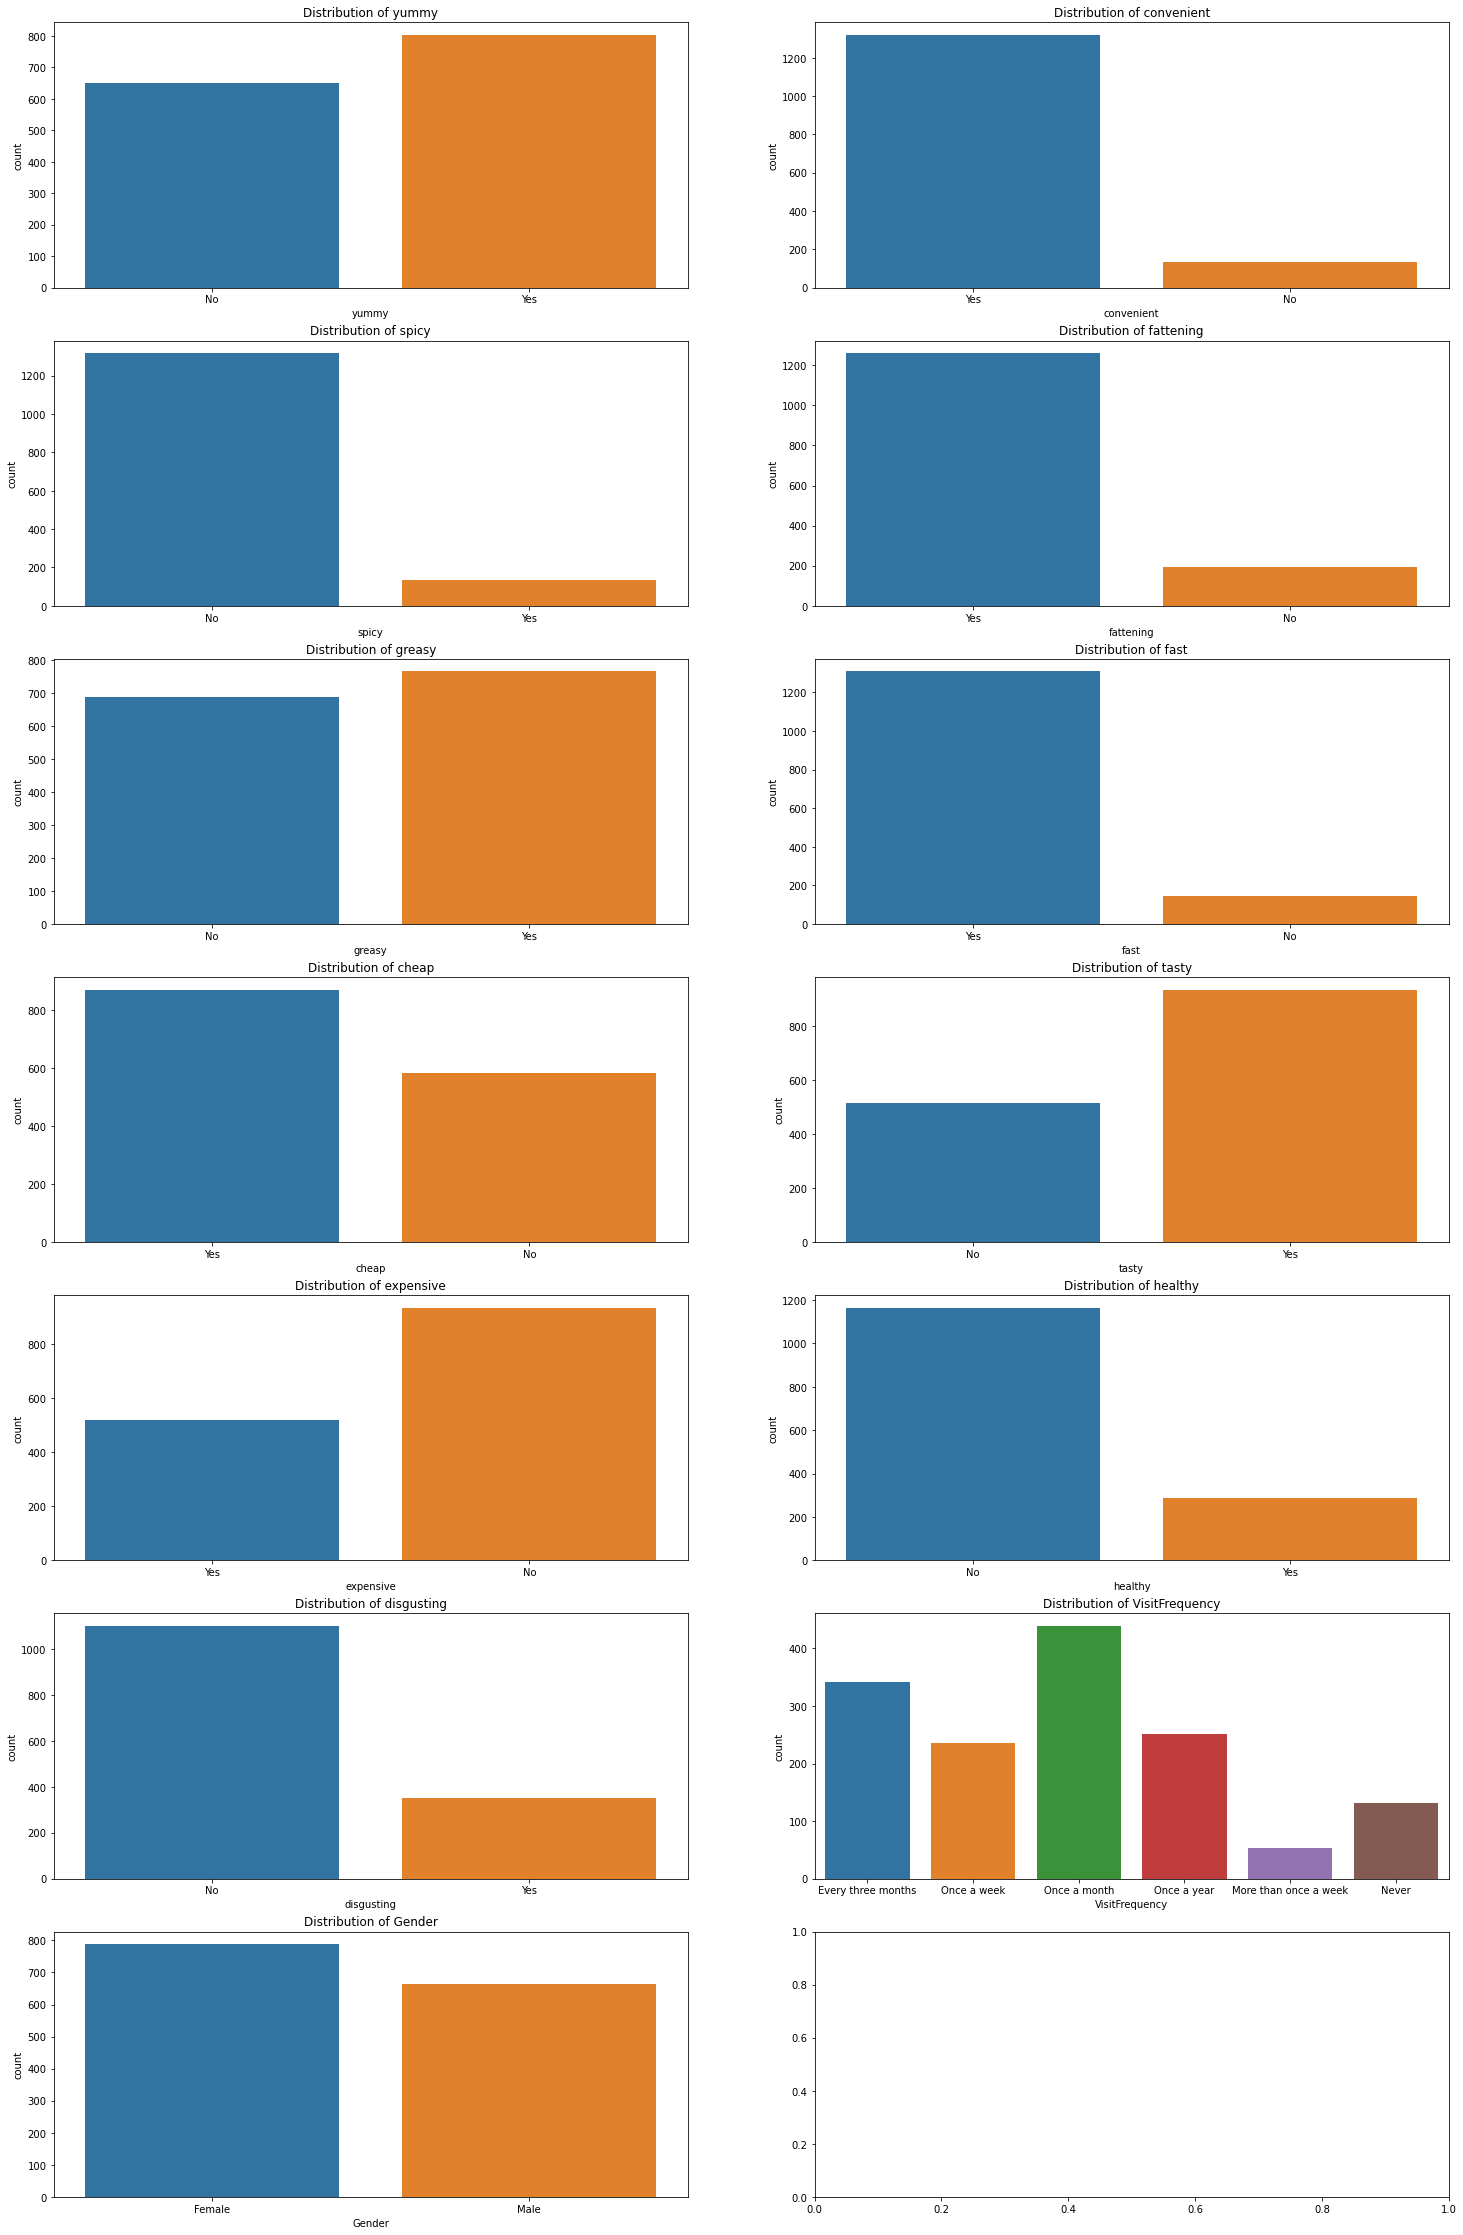

In [11]:
fig,([ax0,ax1],[ax2,ax3],[ax4,ax5],[ax6,ax7],[ax8,ax9],[ax10,ax11],[ax12,ax13]) = plt.subplots(ncols=2,nrows=7,figsize=(25,40))

ax = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13]
for i in range(0,13):
  sns.countplot(data=df,x=category[i],ax=ax[i])
  ax[i].set_title('Distribution of '+category[i])

plt.savefig('count.png')


Observations
*  There are many customers who have never visited once
*  Majority of the customers visits once a month
*  +3 and +2 is given by approx 30 percent the customers
*  60% customers Found the food yummy
*  Approx 90 percent doesn't found convinent and spicy
*  Most of the customers found the service fast and cheap
*  A few customers found the food disgusting
*  Majority customers are Female customers
*  A big group of customers said the food is fatty

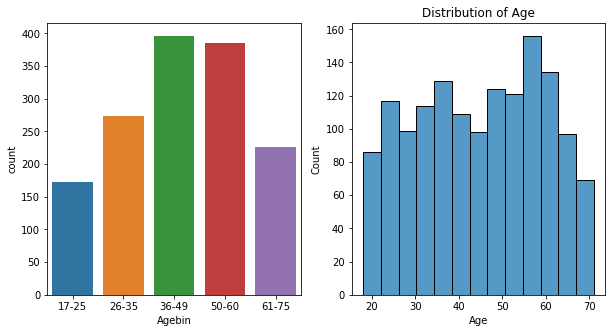

In [12]:
fig,[ax0,ax1] = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.countplot(x=df['Agebin'],ax=ax0)
sns.histplot(x=df['Age'],ax=ax1)
plt.title('Distribution of Age')
plt.savefig('count1.png')
plt.show()

Observations
*  Majority of the customers aged between 36-49
*  Distribution of age is quite a normal
*  Atleast 10 percent of the customers belongs to each of the age group

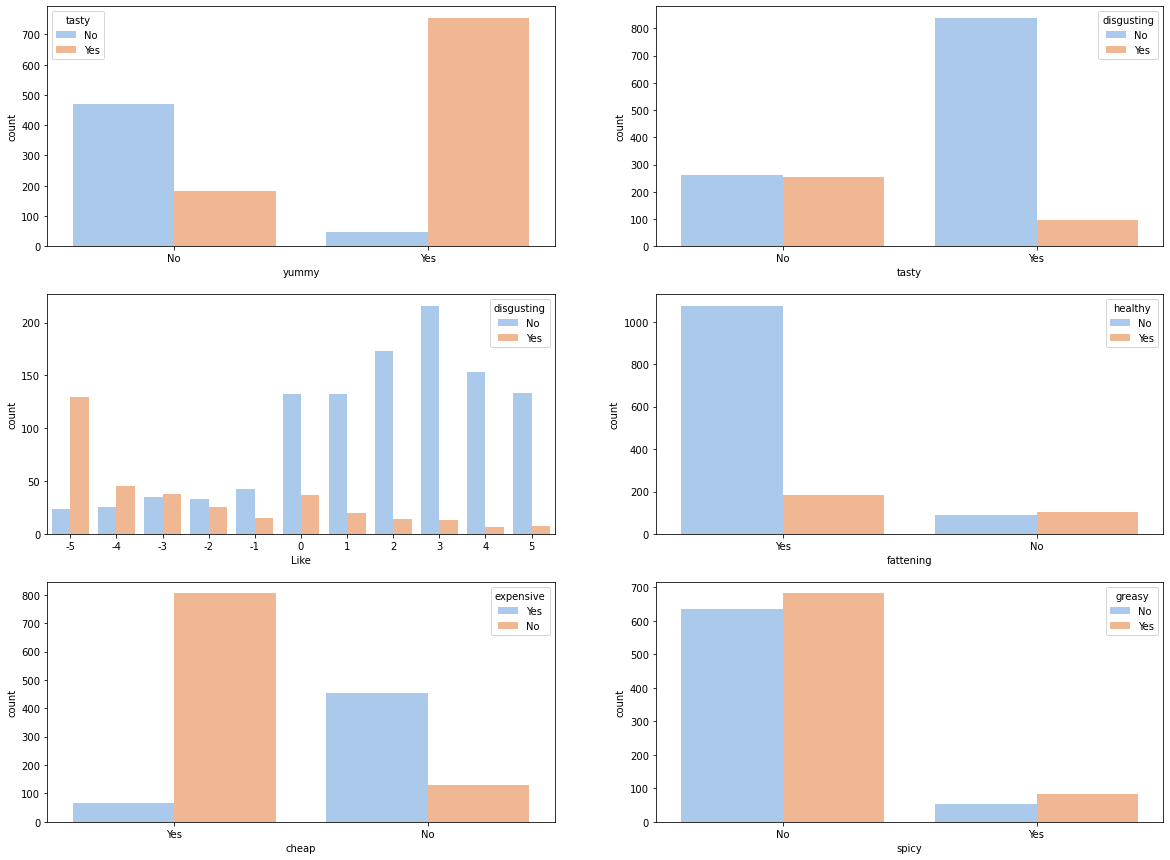

In [13]:
sns.set_palette('pastel')
fig,([ax0,ax1],[ax2,ax3],[ax4,ax5]) = plt.subplots(nrows=3,ncols=2,figsize=(20,15))
sns.countplot(x=df['yummy'],hue=df['tasty'],ax=ax0)
sns.countplot(x=df['tasty'],hue=df['disgusting'],ax=ax1)
sns.countplot(hue=df['disgusting'],x=df['Like'],ax=ax2)
sns.countplot(x=df['fattening'],hue=df['healthy'],ax=ax3)
sns.countplot(x=df['cheap'],hue=df['expensive'],ax=ax4)
sns.countplot(x=df['spicy'],hue=df['greasy'],ax=ax5)
plt.savefig('count2.png')
plt.show()


Observations

*  From the plot it can be seen data have alot of discrepencies
*  **`yummy`** and **`tasty`** are a kind of same can remove either of one
*  Some of the customers rate the food tasty as well as disgusting and vice-versa, needs to check the data
*  same error can be seen in **`cheap`,`expensive`,`disgusting`,`Likes`,`fattening`,`healthy`**
*  **`spicy`** and **`grease`** are highly correlated, can remove either of them
*  Needs to check the data for discrepency and if needs to remove the values than we'll


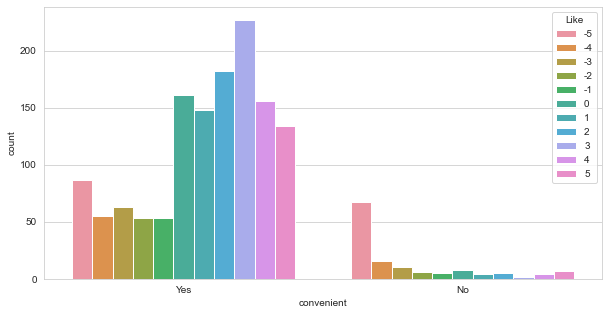

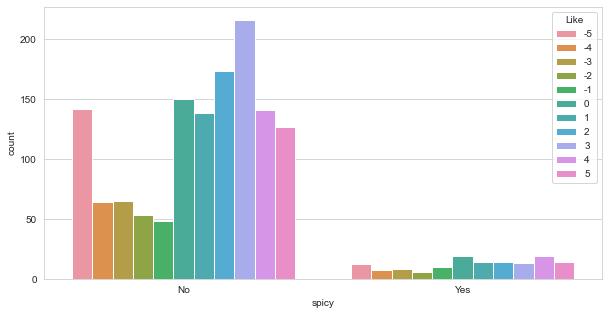

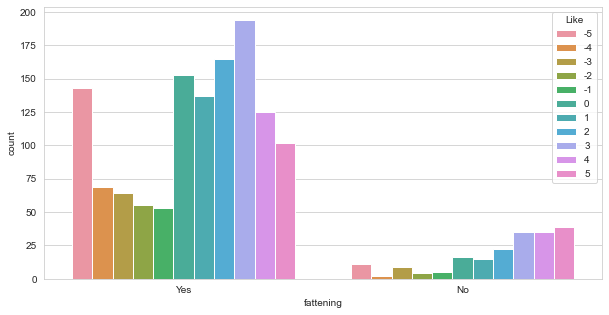

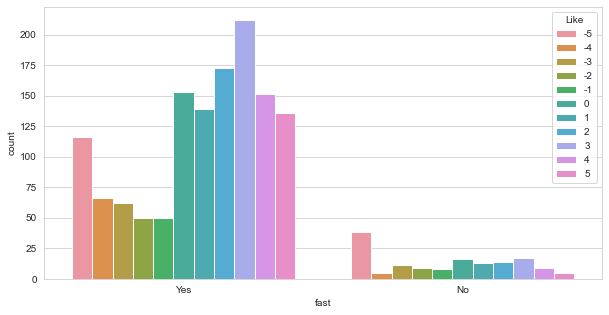

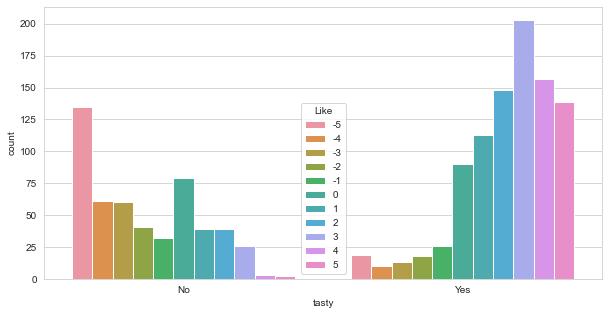

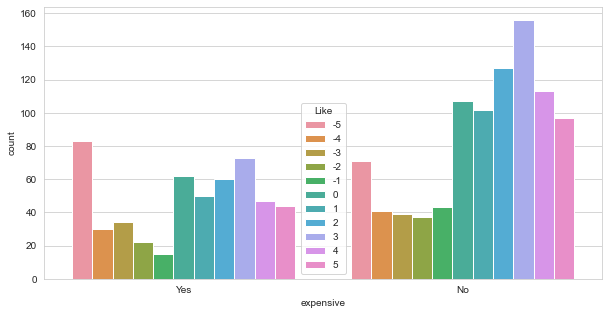

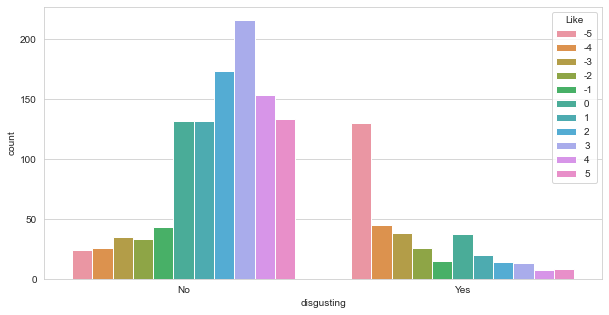

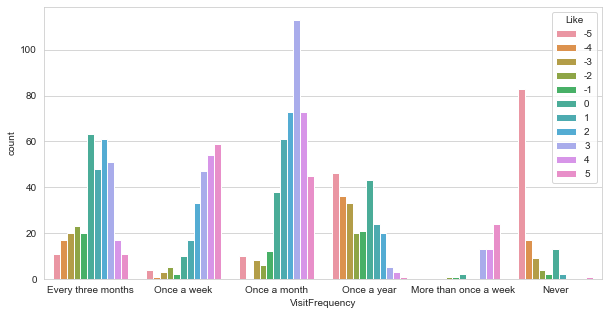

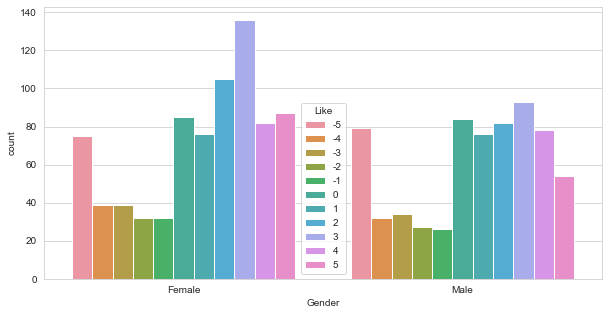

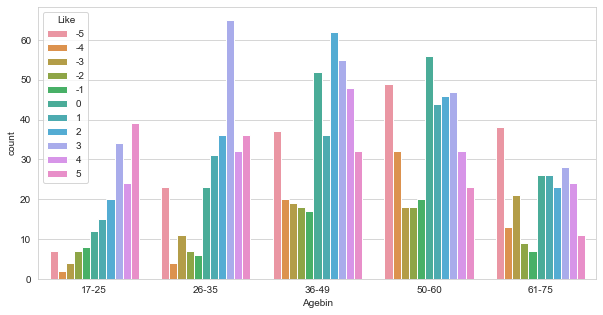

<Figure size 432x288 with 0 Axes>

In [14]:
sns.set_style('whitegrid')
for i in df.drop(['Like','yummy','cheap','healthy','greasy','Age'],axis=1).columns:
  plt.figure(figsize=(10,5))
  sns.countplot(x=df[i],hue=df['Like'])
  plt.show()

plt.savefig('count3.png')

Observations

*  Customers which found food `inconvenient` have most the time rated `I hate it!-5`
*  Most of the customers who doesn't liked the food have given rating of `I hate it!-5`
*  If the food is `disgusting` mostly `I hate it!-5` is given by the customers
*  Those who `never visited` the store have given worst rating
*  Customers who visited `once in a month` majority times rated `+3`
*  Customers visiting `more than once a week` more likely to rate  `I love it!+5`
*  `Female` customers are more likley to rate `+3` where as males ratings are almost equally distributed


In [16]:
import warnings
warnings.filterwarnings("ignore")

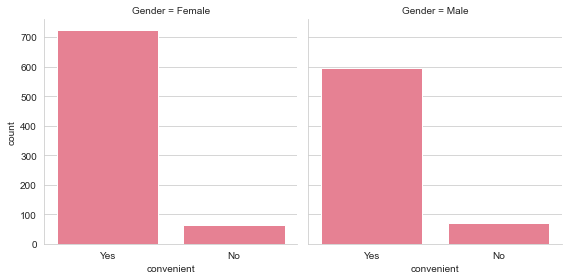

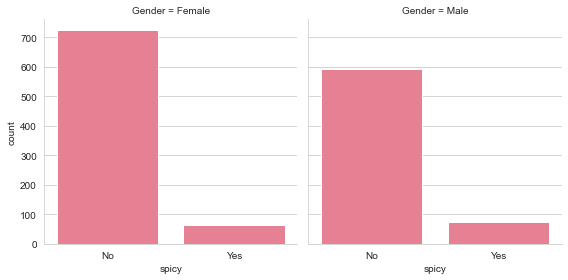

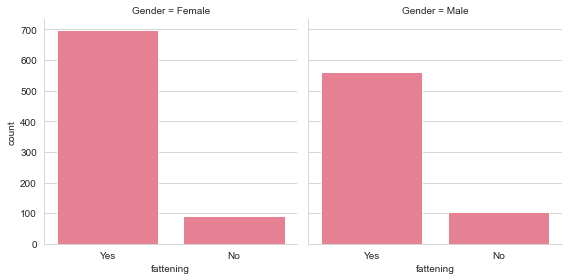

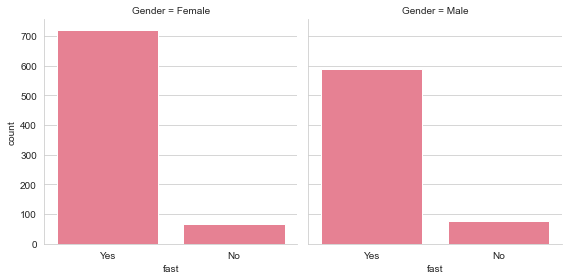

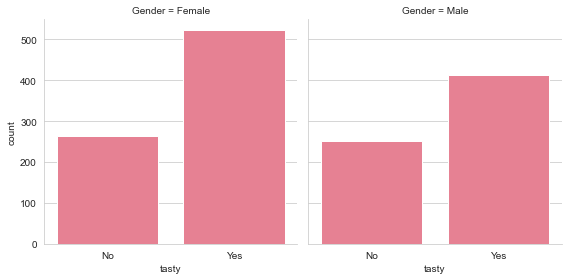

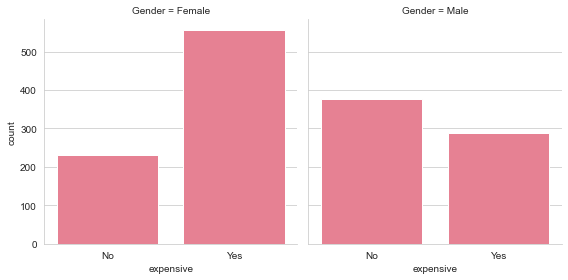

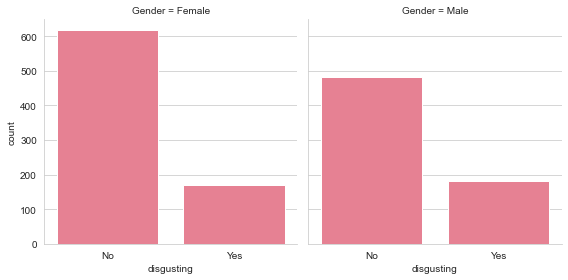

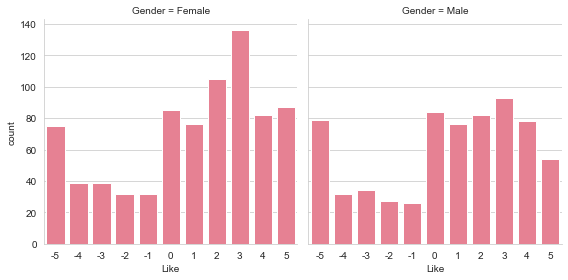

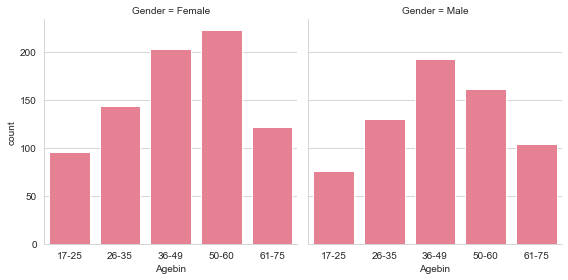

In [17]:
sns.set_palette('husl')
for i in df.drop(['Gender','yummy','cheap','healthy','greasy','Age','VisitFrequency'],axis=1):
  grid = sns.FacetGrid(df,height=4,col='Gender')
  grid = grid.map(sns.countplot,i)
plt.savefig('count4.png')
plt.show()

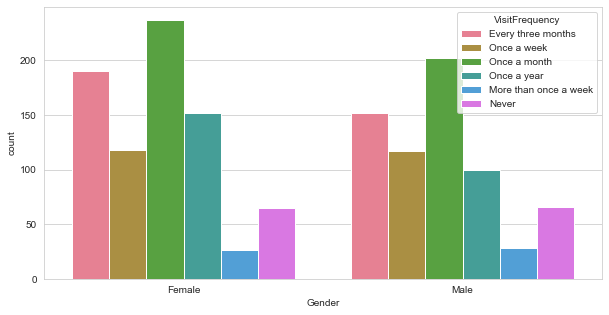

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(hue=df['VisitFrequency'],x=df['Gender'])
plt.savefig('count5.png')

Observations

*  Female customers found it less convenient than male customers
*  Majority of the female customers found the food  expensive where as males doesn't
*  Both the male and the female customers are almost alikly distributed

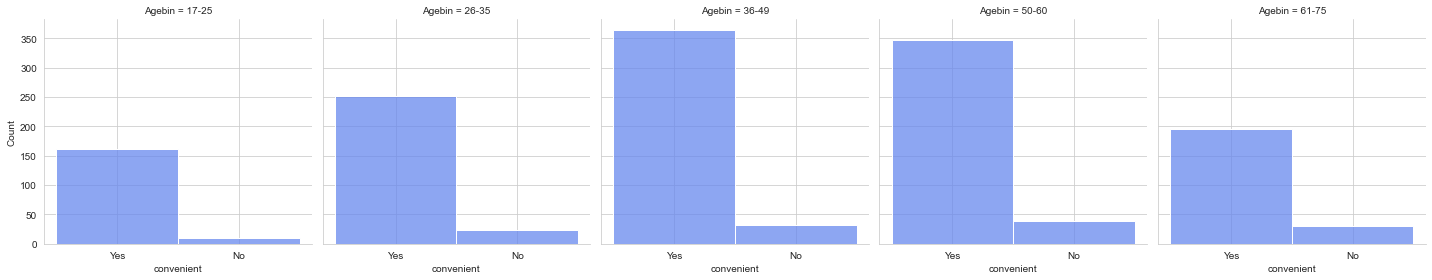

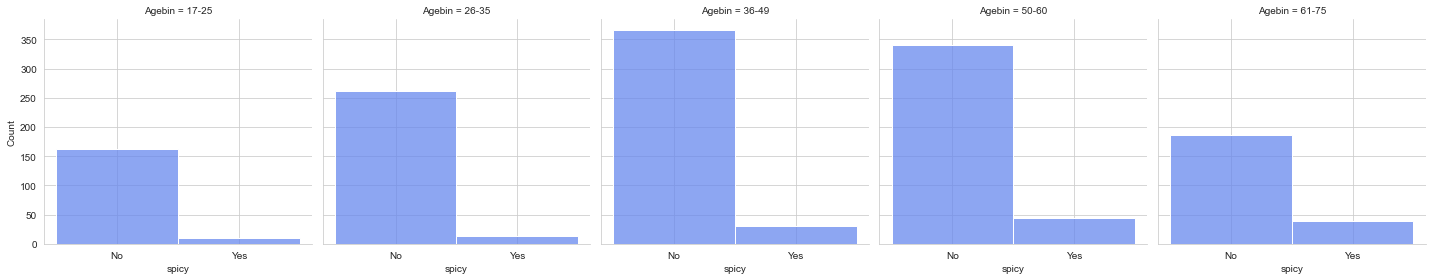

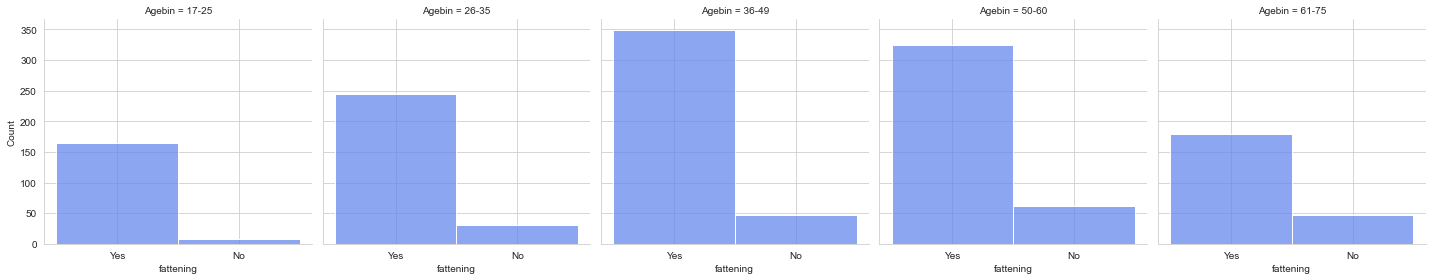

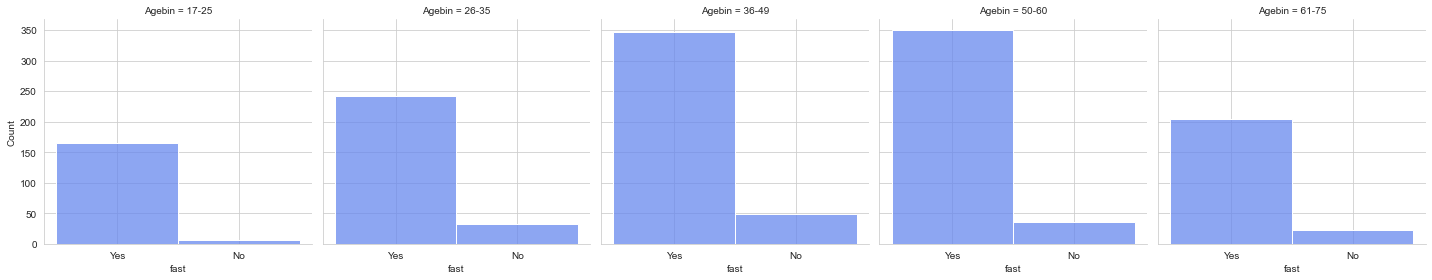

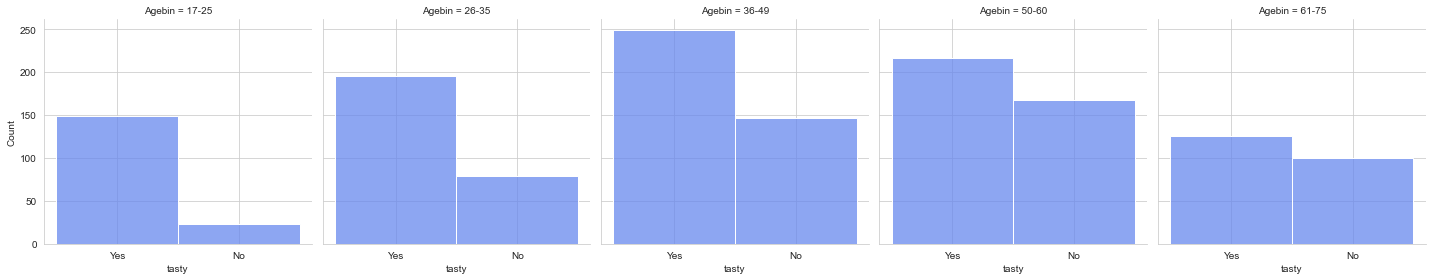

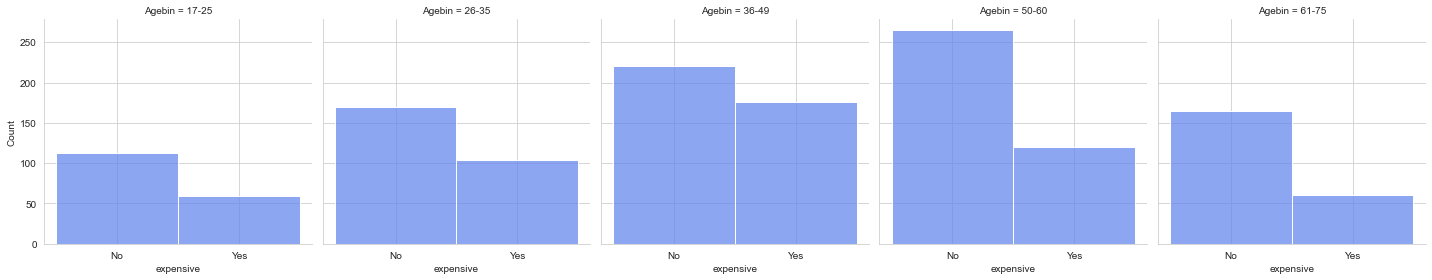

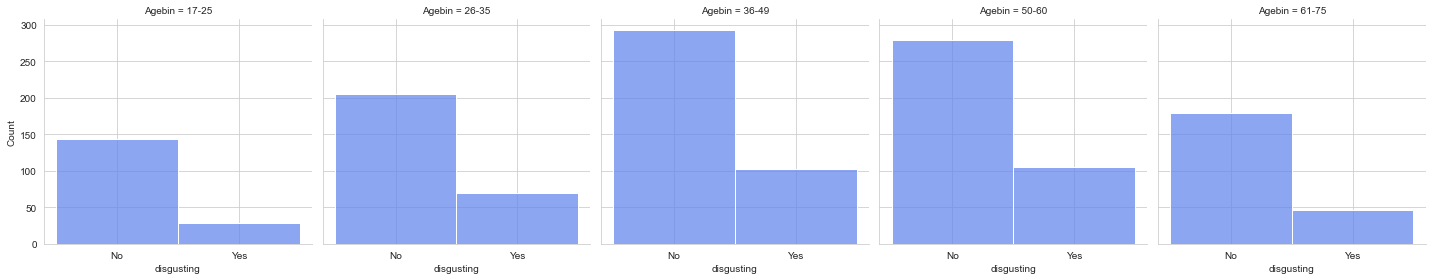

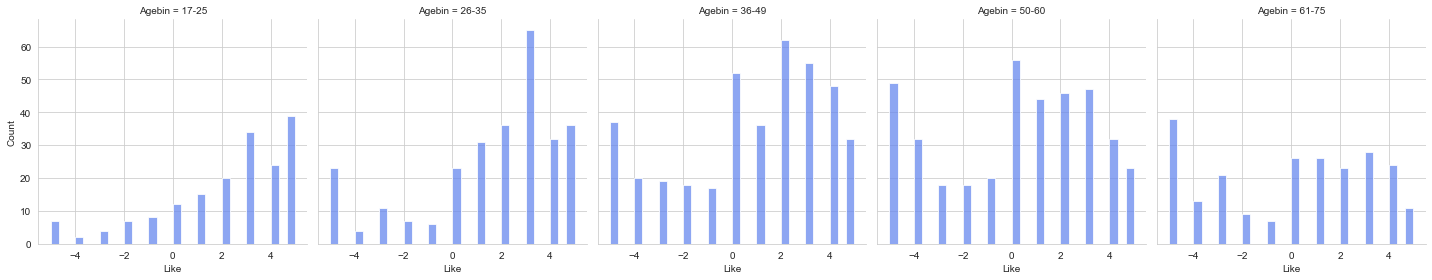

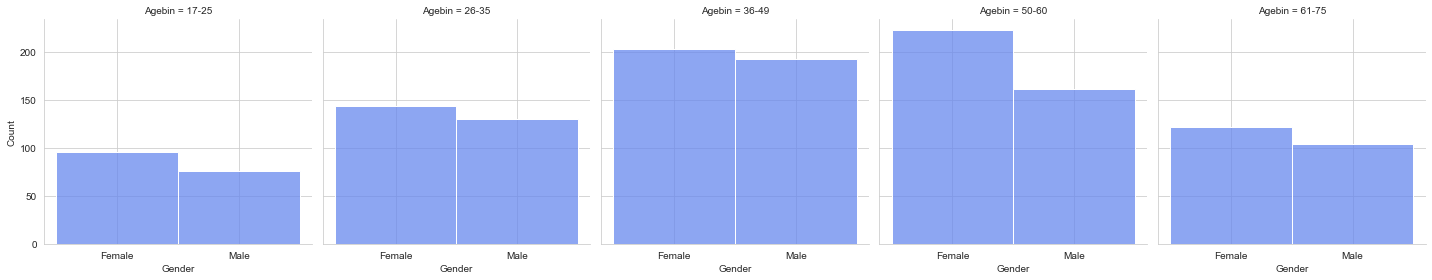

In [19]:
sns.set_palette('coolwarm')
for i in df.drop(['Agebin','yummy','cheap','healthy','greasy','Age','VisitFrequency'],axis=1):
  grid = sns.FacetGrid(df,height=4,col='Agebin')
  grid = grid.map(sns.histplot,i,bins=30)
plt.savefig('count6.png')
plt.show()

##Data Preprocessing

In [87]:
# converting into numericals
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Agebin
0,0,1,0,1,0,1,1,0,1,0,0,2,61,2,0,61-75
1,1,1,0,1,1,1,1,1,1,0,0,7,51,2,0,50-60
2,0,1,1,1,1,1,0,1,1,1,0,6,62,2,0,61-75
3,1,1,0,1,1,1,1,1,0,0,1,9,69,4,0,61-75
4,0,1,0,1,1,1,1,0,0,1,0,7,49,3,1,36-49


In [65]:
def encoder():
    df['yummy'] = df['yummy'].replace(['Yes','No'],[1,0])
    df['convenient'] = df['convenient'].replace(['Yes','No'],[1,0])
    df['spicy'] = df['spicy'].replace(['Yes','No'],[1,0])
    df['fattening'] = df['fattening'].replace(['Yes','No'],[1,0])
    df['greasy'] = df['greasy'].replace(['Yes','No'],[1,0])
    df['fast'] = df['fast'].replace(['Yes','No'],[1,0])
    df['cheap'] = df['cheap'].replace(['Yes','No'],[1,0])
    df['tasty'] = df['tasty'].replace(['Yes','No'],[1,0])
    df['expensive'] = df['expensive'].replace(['Yes','No'],[1,0])
    df['healthy'] = df['healthy'].replace(['Yes','No'],[1,0])
    df['disgusting'] = df['disgusting'].replace(['Yes','No'],[1,0])
    df['Gender'] = df['Gender'].replace(['Male','Female'],[1,0])
    df['VisitFrequency'] = df['VisitFrequency'].replace(['Never','Once a year','Every three months','Once a month',
                                                     'Once a week','More than once a week'],[0,1,2,3,4,5])
    df['Like'] = df['Like'].replace(['I hate it!-5','-4','-3','-2','-1','0','1','2','3','4','I love it!+5'],
                                [0,1,2,3,4,5,6,7,8,9,10])

In [66]:
encoder()

In [37]:
import pickle
pickle.dump(en,open('encoder.pkl','wb'))

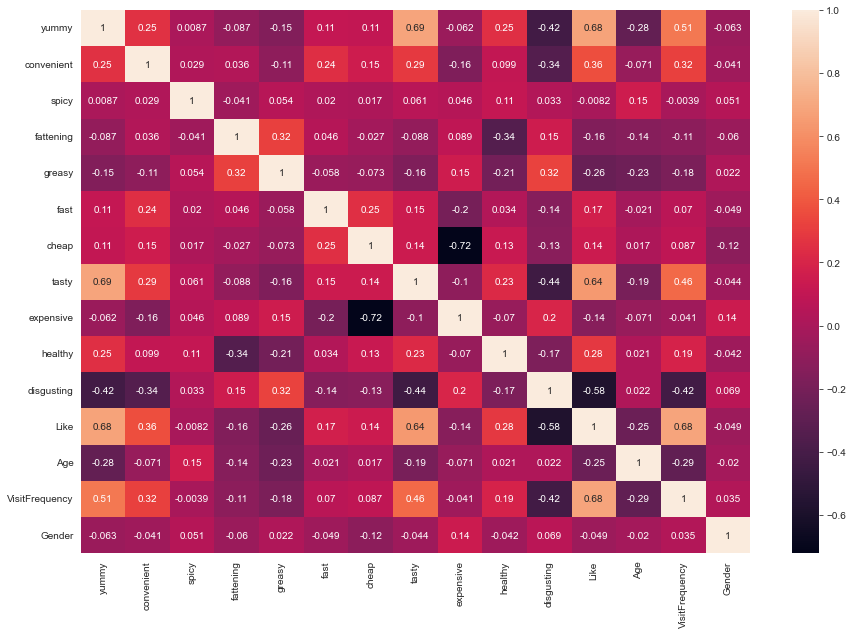

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.savefig('count7.png')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   yummy           1453 non-null   int64   
 1   convenient      1453 non-null   int64   
 2   spicy           1453 non-null   int64   
 3   fattening       1453 non-null   int64   
 4   greasy          1453 non-null   int64   
 5   fast            1453 non-null   int64   
 6   cheap           1453 non-null   int64   
 7   tasty           1453 non-null   int64   
 8   expensive       1453 non-null   int64   
 9   healthy         1453 non-null   int64   
 10  disgusting      1453 non-null   int64   
 11  Like            1453 non-null   object  
 12  Age             1453 non-null   int64   
 13  VisitFrequency  1453 non-null   int64   
 14  Gender          1453 non-null   int64   
 15  Agebin          1453 non-null   category
dtypes: category(1), int64(14), object(1)
memory usage: 172.0+ KB

Observations
*  yummy is correlated with like and tasty
*  expensive with cheap
*  like is correlated with visitfrequency


## Extract Segments

In [88]:
##Using k-means clustering

from sklearn.decomposition import PCA

pca = PCA(n_components=14)
data = pca.fit_transform(df.drop(['Age','Agebin'],axis=1))
pc = pd.DataFrame(data=data,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14'])

In [89]:
pc.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14
0,3.746578,0.711531,-0.340867,0.442599,0.615926,-0.337585,-0.319521,-0.242126,-0.376609,-0.188142,0.138768,0.184291,0.539076,-0.553440
1,-1.112208,-0.719394,0.251637,-0.675627,0.340507,0.356094,-0.151875,-0.086281,-0.079150,-0.089554,-0.036662,0.126941,0.507671,-0.531743
2,-0.078865,-0.393926,0.747944,-0.168268,0.539078,0.203277,0.720776,-0.885240,-0.623744,0.597505,0.321975,-0.321744,0.068764,0.222372
3,-3.519994,0.537511,-0.321155,-1.034471,0.080770,-0.120180,0.274559,0.801217,-0.103357,0.065294,-0.222402,-0.082562,-0.214825,-0.005298
4,-1.252794,0.234411,-0.340806,-0.131475,-0.792487,-0.645553,0.788675,-0.647022,-0.106097,-0.472202,0.208451,-0.096126,0.023990,0.136414


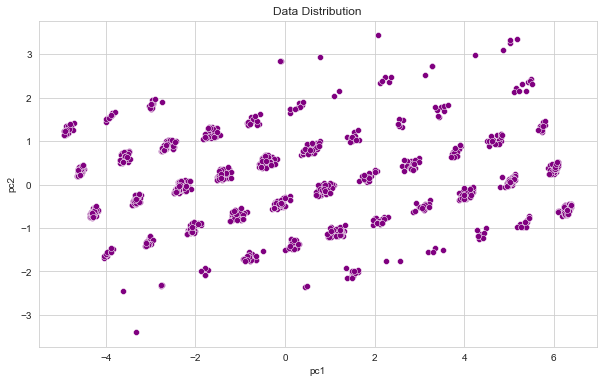

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=pc,x='pc1',y='pc2',color='purple')
plt.title('Data Distribution')
plt.savefig('count8.png')

C:\Users\Admin\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\miniconda3\lib\site-packages\sklearn\

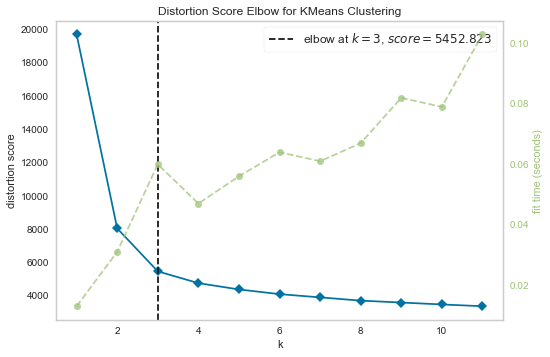

<Figure size 576x396 with 0 Axes>

In [90]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,12)).fit(pc)
visualizer.show()
plt.savefig('count9.png')

Observation
*  Chossing 3 as value of k

In [91]:
# training the model with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(pc)

C:\Users\Admin\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [92]:
# predicting the clusters
np.random.seed(42)
preds = kmeans.predict(pc)

In [17]:
import pickle
pickle.dump(kmeans,open('clustering.pkl','wb'))

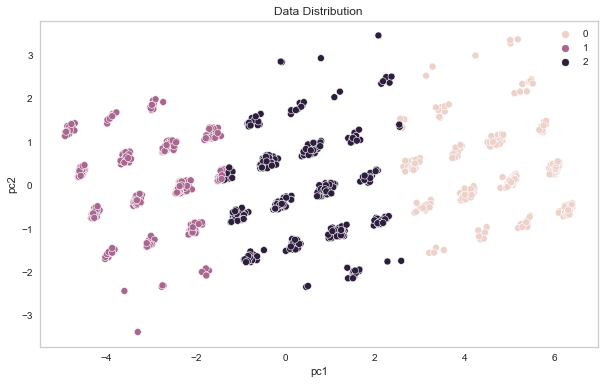

In [93]:
# plotting the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=pc['pc1'],y=pc['pc2'],hue=preds)
plt.title('Data Distribution')
plt.savefig('count10.png')
plt.show()

In [94]:
df['cluster'] = preds

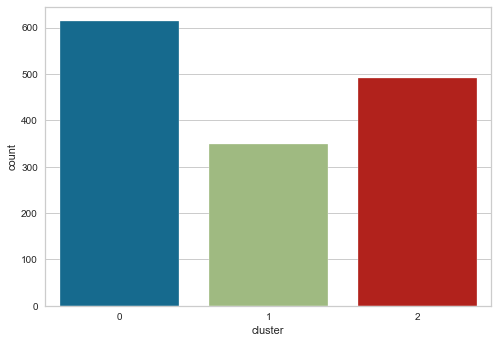

In [32]:
sns.countplot(x = df['cluster'])
plt.savefig('count11.png')

In [45]:
df['cluster'].value_counts()/len(df)*100

1    42.395045
2    33.792154
0    23.812801
Name: cluster, dtype: float64

Observations
*  maximum customers belongs to cluster 0
*  approx 25 percent of the customers comes under cluster 0

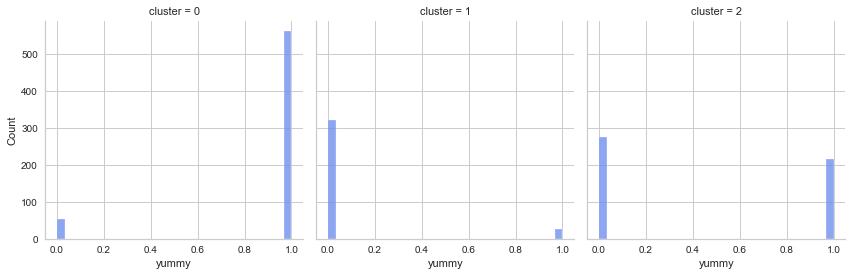

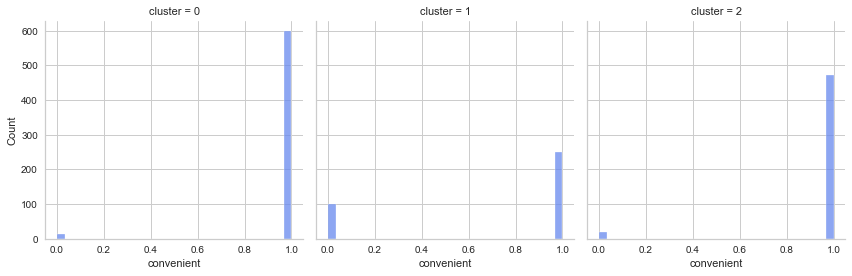

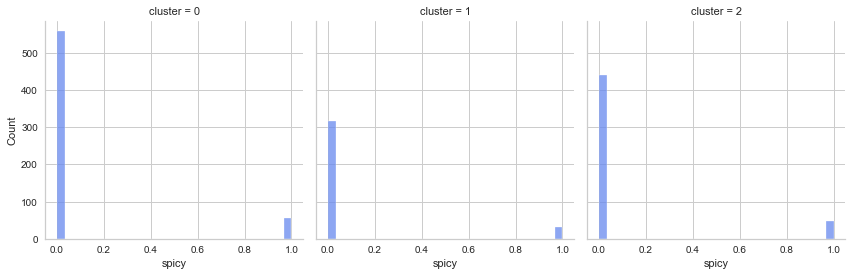

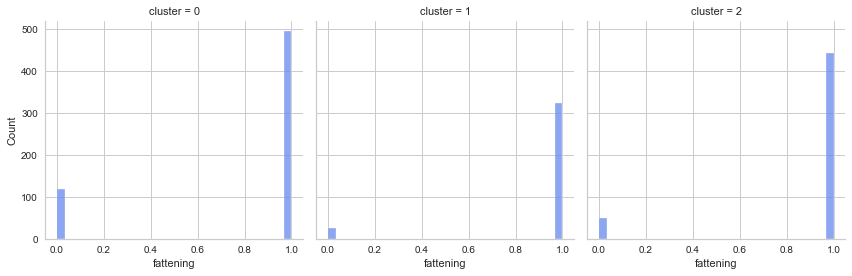

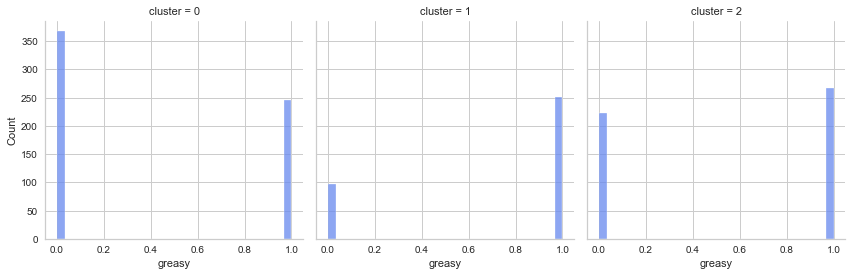

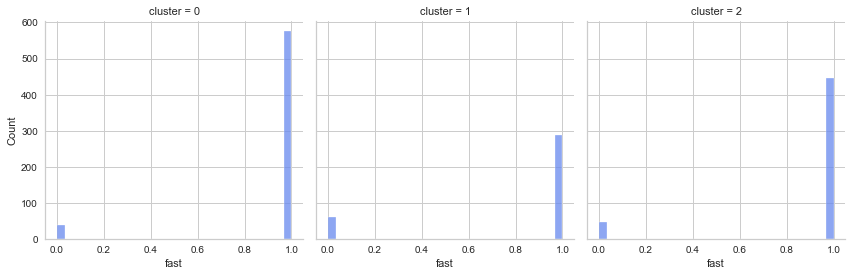

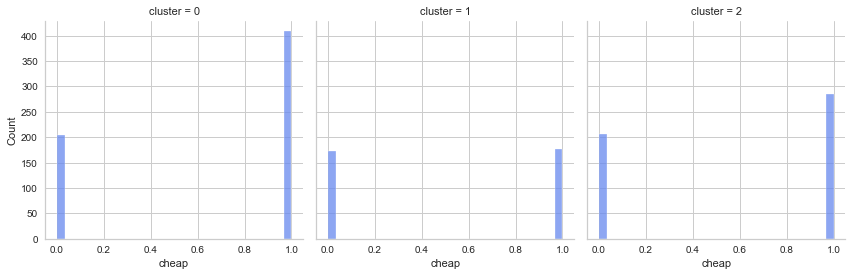

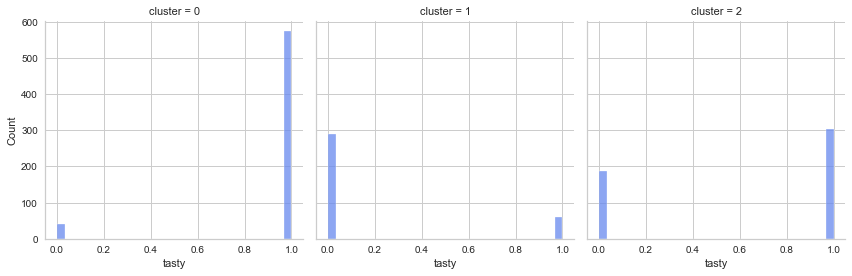

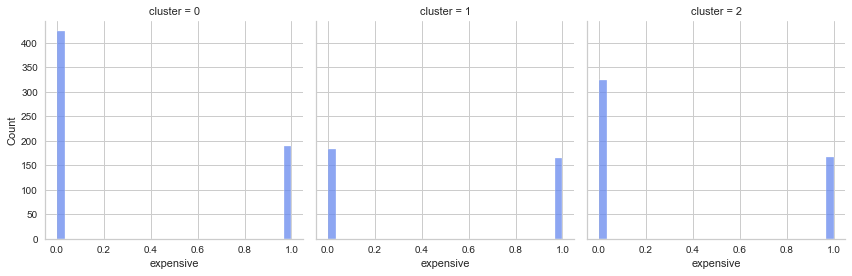

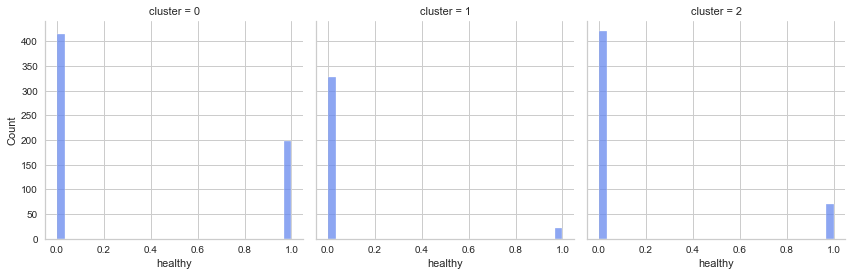

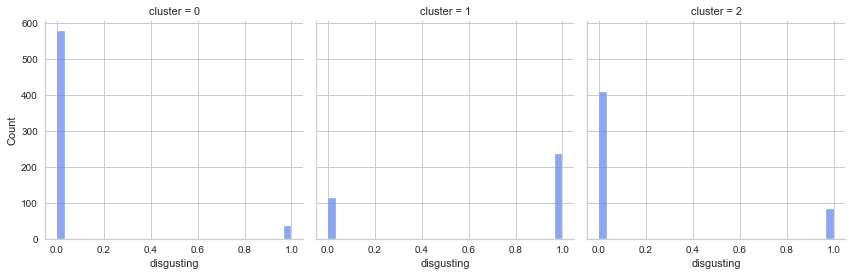

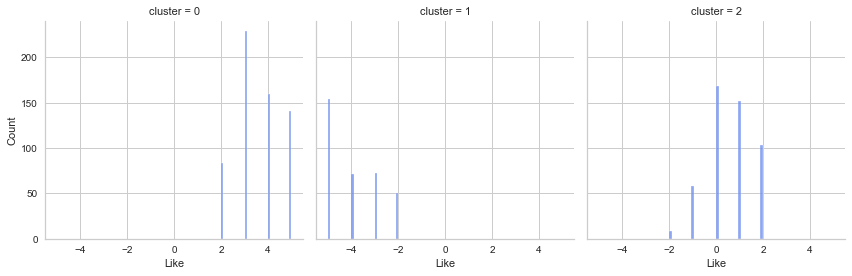

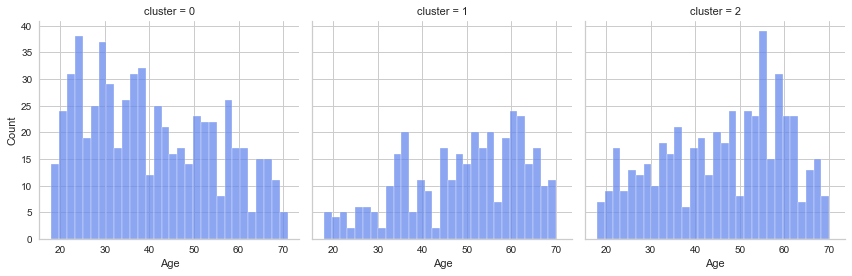

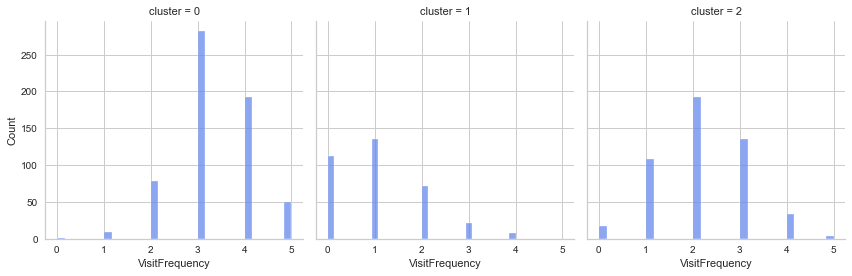

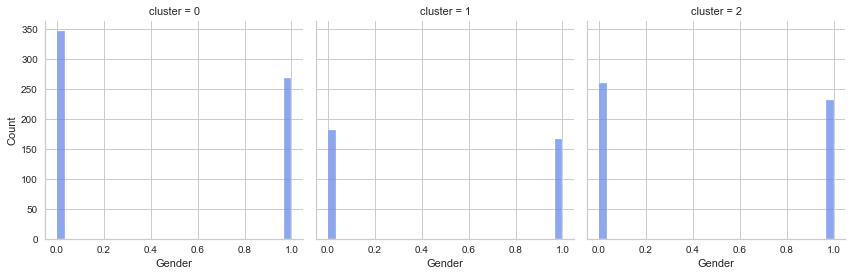

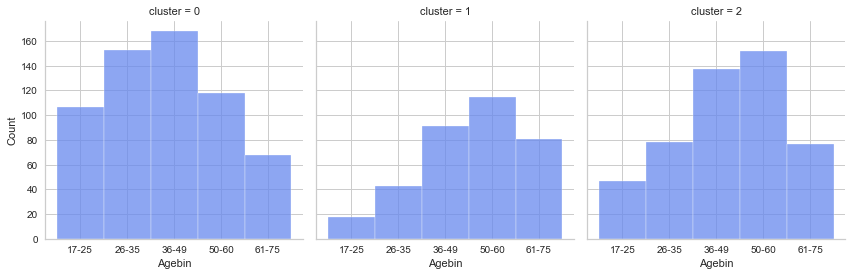

In [34]:
sns.set_palette('coolwarm')
for i in df.drop(['cluster'],axis=1):
  grid = sns.FacetGrid(df,height=4,col='cluster')
  grid = grid.map(sns.histplot,i,bins=30)
plt.show()

Observations
*  cluster 0 contains most of the customers who voted for not yummy where as in cluster 1 customers mostly voted yummy
*  same is for tasty, cluster 0 customers almost doesn't find the food tasty
*  customers belonging to cluster 1 doesn't find the food convienent
*  Like is distributed with in intervals
> *  Like -5 to -2 belongs to cluster 0
> *  +2 to +5 belongs to cluster 1
>*  -2 to +2 belongs to cluster 2
*  cluster 0 doesn't contain customers visited more than once in a month
*  cluster 1 does not contain who have never visited the store
*  most of the customers of cluster 2 have not visited more than once in a week





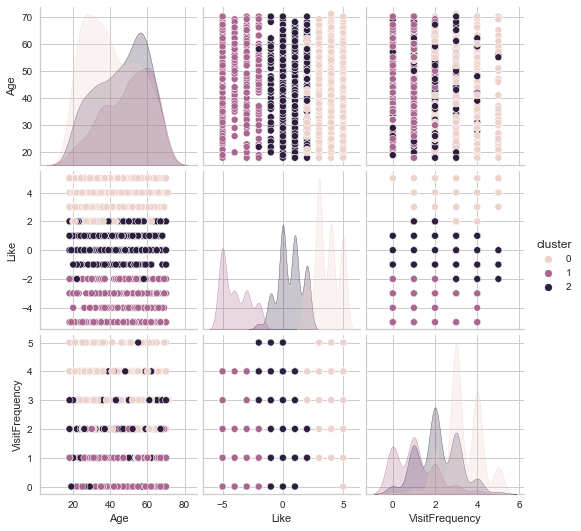

In [35]:
# selecting Target variables

df_1 = df[['Age','Like','VisitFrequency','cluster']]
sns.pairplot(data=df_1,hue='cluster')

## Classification

In [85]:
from sklearn.model_selection import train_test_split

In [19]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2,61,2,0,2
1,1,1,0,1,1,1,1,1,1,0,0,7,51,2,0,0
2,0,1,1,1,1,1,0,1,1,1,0,6,62,2,0,0
3,1,1,0,1,1,1,1,1,0,0,1,9,69,4,0,1
4,0,1,0,1,1,1,1,0,0,1,0,7,49,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,0,47,1,1,2
1449,1,1,0,1,0,0,1,1,0,1,0,7,36,4,0,1
1450,1,1,0,1,0,1,0,1,1,0,0,8,52,3,0,1
1451,1,1,0,0,0,1,1,1,0,1,0,9,41,2,1,1


In [95]:
x = df.drop(['cluster','Agebin'],axis=1)
y = df['cluster']

In [96]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
x_train.shape,y_train.shape

((1162, 15), (1162,))

In [97]:
## scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [98]:
#using logisitc regression for classification
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train,y_train)

## predictions
preds = clf.predict(x_test)

In [99]:
## performmance of the model
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

print(classification_report(y_test,preds))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99        69
           1       0.98      0.98      0.98       124
           2       0.97      0.96      0.96        98

    accuracy                           0.98       291
   macro avg       0.98      0.98      0.98       291
weighted avg       0.98      0.98      0.98       291



Observation
*  Model is performing great
*  Need not to tune parameters

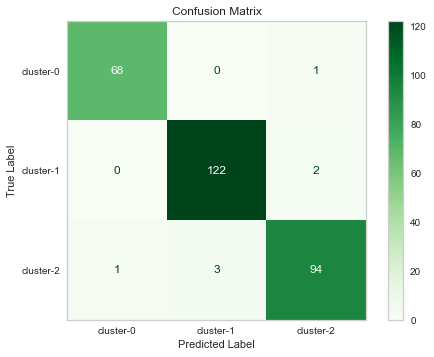

In [100]:
sns.set_style("whitegrid", {'axes.grid' : False})

cm = confusion_matrix(y_test,preds,labels=[0,1,2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["cluster-0","cluster-1",'cluster-2'])
disp.plot(cmap='Greens',colorbar=True,)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('count12.png')
plt.show()

In [57]:
result = clf.predict(scaler.transform([[1,1,0,0,0,1,1,1,0,1,0,3,30,4,0]]))
print("Cluster = ",result)

Cluster =  [2]


C:\Users\Admin\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [27]:
import pickle
pickle.dump(clf,open('predictor.pkl','wb'))

In [58]:
#model = pickle.load(open('predictor.pkl','rb'))
print(clf.predict([[1,1,0,0,0,1,1,1,0,1,0,3,30,4,0]]))

[1]


In [56]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,preds))

0.9759450171821306


In [29]:
pickle.dump(scaler,open('scaler.pkl','wb'))

In [33]:
from sklearn.decomposition import PCA
data = df.iloc[100,:]
data.shape

(15,)

In [34]:
data

yummy                       No
convenient                 Yes
spicy                       No
fattening                  Yes
greasy                     Yes
fast                       Yes
cheap                      Yes
tasty                       No
expensive                   No
healthy                     No
disgusting                  No
Like                         3
Age                         50
VisitFrequency    Once a month
Gender                    Male
Name: 100, dtype: object

In [35]:
data = np.array(data)

In [36]:
data

array(['No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', '3', 50, 'Once a month', 'Male'], dtype=object)

In [37]:
data.reshape(1,-1)
data

array(['No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', '3', 50, 'Once a month', 'Male'], dtype=object)

In [38]:
data.shape

(15,)

In [39]:
data.reshape(-1,1)
data

array(['No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', '3', 50, 'Once a month', 'Male'], dtype=object)

In [41]:
data.shape

(15,)

In [48]:
data.reshape(15,1)
data

array(['No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', '3', 50, 'Once a month', 'Male'], dtype=object)

In [45]:
data.shape

(15,)

In [59]:
#data = data.reshape(1,-1)
data

array([[ 0,  1,  0,  1,  1,  1,  1,  0,  0,  0,  0,  8, 50,  3,  1]])

In [70]:
pca = PCA()
data = np.array([0,1,0,1,1,1,1,0,0,0,0,8,50,3,1])
data = data.reshape(1,-1)

In [71]:
data = pca.fit_transform(data)

C:\Users\Admin\miniconda3\lib\site-packages\sklearn\decomposition\_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


In [72]:
data

array([[0.]])

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
i = scaler.fit_transform([[1,1,0,0,0,1,1,1,0,1,0,3,30,4,0]])

In [84]:
i[0][12]==0

True

In [85]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Agebin
0,0,1,0,1,0,1,1,0,1,0,0,2,61,2,0,61-75
1,1,1,0,1,1,1,1,1,1,0,0,7,51,2,0,50-60
2,0,1,1,1,1,1,0,1,1,1,0,6,62,2,0,61-75
3,1,1,0,1,1,1,1,1,0,0,1,9,69,4,0,61-75
4,0,1,0,1,1,1,1,0,0,1,0,7,49,3,1,36-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,0,47,1,1,36-49
1449,1,1,0,1,0,0,1,1,0,1,0,7,36,4,0,36-49
1450,1,1,0,1,0,1,0,1,1,0,0,8,52,3,0,50-60
1451,1,1,0,0,0,1,1,1,0,1,0,9,41,2,1,36-49


In [86]:
x_train = scaler.fit_transform(df.drop(['Agebin'],axis=1))
i = scaler.transform([[1,1,0,0,0,1,1,1,0,1,0,3,30,4,0]])

C:\Users\Admin\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [87]:
print(i)

[[ 0.89970246  0.31873518 -0.32134871 -2.55509245 -1.05447551  0.33295085
   0.81860549  0.74320282 -0.74655335  2.00690848 -0.56648839 -0.89127681
  -1.0273399   1.25075617 -0.918645  ]]


In [53]:
import pickle
pickle.dump(scaler,open('scaler1.pkl','wb'))

In [59]:
data = np.array([[1,1,0,0,0,1,1,1,0,1,0,3,30,4,0]])
data.shape

(1, 15)

In [60]:
pca_train = PCA()

In [76]:
pca_train.fit(df.drop(['Age','Agebin'],axis=1))
data_pca = pca_train.transform(data)

C:\Users\Admin\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [77]:
data_pca

array([[ 5.57012965, -0.20178176, -0.17290454, ...,  2.18651857,
        -1.34947953,  0.10535483],
       [ 6.12086269, -0.24387378, -0.2325028 , ..., -0.19860223,
         0.65297351,  0.79423645],
       [ 6.6250108 , -0.53600308, -0.92455162, ...,  0.83646763,
         0.12756253,  0.66909682],
       ...,
       [ 6.45466953, -0.55741   ,  0.13331681, ..., -1.18483237,
         0.06492511,  0.80601336],
       [ 6.5403612 , -0.71862947, -0.49689564, ..., -1.77539168,
         1.85492613,  1.02676778],
       [ 6.10455925, -0.98278584, -0.23696153, ...,  2.59663634,
        -1.04591607, -0.55090568]])

In [78]:
pickle.dump(pca_train,open('pca.pkl','wb'))

In [81]:
pca_train = pickle.load(open('pca.pkl','rb'))

In [82]:
pca_train.transform(data)

C:\Users\Admin\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[ 5.57012965, -0.20178176, -0.17290454, ...,  2.18651857,
        -1.34947953,  0.10535483],
       [ 6.12086269, -0.24387378, -0.2325028 , ..., -0.19860223,
         0.65297351,  0.79423645],
       [ 6.6250108 , -0.53600308, -0.92455162, ...,  0.83646763,
         0.12756253,  0.66909682],
       ...,
       [ 6.45466953, -0.55741   ,  0.13331681, ..., -1.18483237,
         0.06492511,  0.80601336],
       [ 6.5403612 , -0.71862947, -0.49689564, ..., -1.77539168,
         1.85492613,  1.02676778],
       [ 6.10455925, -0.98278584, -0.23696153, ...,  2.59663634,
        -1.04591607, -0.55090568]])

In [ ]:
pca_train.transform([[1,1,0,1,0,0,1,1,0,1,0,7,36,4,]])